# **Importowanie bibliotek**

In [50]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly
from chart_studio import plotly
from plotly import express as px
from stargazer.stargazer import Stargazer
import plotly.figure_factory as ff
from plotly import graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
from chart_studio import plotly as py
from pylab import *
from statsmodels.formula.api import ols
from scipy import stats as st
from sklearn.preprocessing import PolynomialFeatures

# **Ładowanie i opis danych**

In [51]:
data = pd.read_csv("Data/Maths.csv") 
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [52]:
data['Wynik'] = data['G3'] 
data['Płeć'] = data['sex'].apply(lambda x: 1 if x=='F' else 0) #kobieta
data['Miejsce_zamieszkania'] = data['address'].apply(lambda x: 1 if x=='U' else 0) #miasto
data['Korepetycje'] = data['schoolsup'].apply(lambda x: 1 if x=='yes' else 0) 
data['W_związku'] = data['romantic'].apply(lambda x: 1 if x=='yes' else 0) 
data['Nauka'] = data['studytime']
data['Nauka_między_2_i_5'] = data['studytime'].apply(lambda x: 1 if x==2 else 0)  #Tutaj poziom bazowy to < 2 godziny w tygodniu
data['Nauka_między_5_i_10'] = data['studytime'].apply(lambda x: 1 if x==3 else 0) 
data['Nauka_więcej_niz_10'] = data['studytime'].apply(lambda x: 1 if x==4 else 0)   
data['Poprawki'] = data['failures'].apply(lambda x: 1 if x in (1, 2, 3) else 0) #Tutaj postanowiłem zamienić zmienną kategoryczną na binarną, ponieważ niewielka różnica w R^2, a ponadto można jakoś uzasadnić, że jest zdecydowanie więcej tych bez poprawek
data['Wychodzenie_ze_znajomymi'] = data['goout'].apply(lambda x: 1 if x in (4, 5) else 0) #Tutaj też zamieniłem kategroyczną na binarną i wychodzący to tacy, którzy zadeklarowali, że wychodzą częściej niż przeciętni ankietowania
data['Alkohol'] = data['Dalc'].apply(lambda x: 1 if x in (2, 3, 4, 5) else 0) #Znowu zamiana z kategorycznej na binarną i konsumujący alkohol to tacy, którzy powiedzieli, że spożywają alkohol w tygodniu
data['Nieobecności'] = data['absences']

# **Charakterystyka zmiennych**

Zmienna objaśniana - Wynik

Podstawowe staytystyki opisowe

In [53]:
np.round(data['Wynik'].describe(), 3)

count    395.000
mean      10.415
std        4.581
min        0.000
25%        8.000
50%       11.000
75%       14.000
max       20.000
Name: Wynik, dtype: float64

Histogram

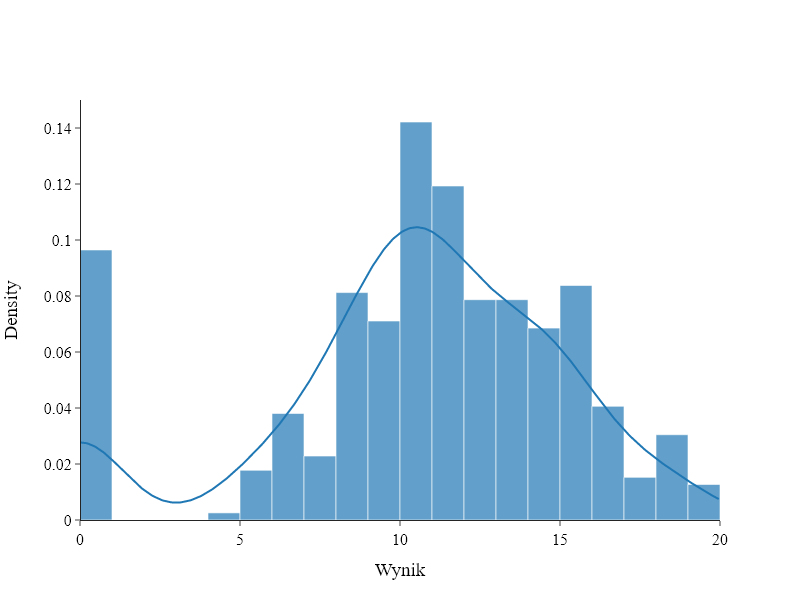

In [54]:
hist_data = [data['Wynik'].values.flatten().tolist()]
group_labels =['Wynik']
fig = ff.create_distplot(hist_data, group_labels=group_labels, show_rug=False, curve_type='kde', bin_size=1)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, xaxis_title="Wynik",yaxis_title="Density", font=dict(family="Times New Roman",size=16,color="Black"))
fig.update_yaxes(range=[0, 0.15], autorange=False)
fig.show("png")

Zmienne objaśniające

Płeć

In [55]:
print("Dla kobiet:")
print("Liczebność: {}".format(data.loc[data["Płeć"] == 1, "Płeć"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Płeć"] == 1, "Płeć"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(np.round(100*data.loc[data["Płeć"] == 1, "Płeć"].describe()["count"]/len(data), 3)))
print("Dla mężczyzn:")
print("Liczebność: {}".format(data.loc[data["Płeć"] == 0, "Płeć"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Płeć"] == 0, "Płeć"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(100))

Dla kobiet:
Liczebność: 208.0
Procent 52.658
Procent skumulowany: 52.658
Dla mężczyzn:
Liczebność: 187.0
Procent 47.342
Procent skumulowany: 100


Niemal 53% badanej próby stanowiły kobiety, 47% - mężczyźni

Miejsce zamieszkania

In [56]:
print("Dla miasta:")
print("Liczebność: {}".format(data.loc[data["Miejsce_zamieszkania"] == 1, "Miejsce_zamieszkania"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Miejsce_zamieszkania"] == 1, "Miejsce_zamieszkania"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(np.round(100*data.loc[data["Miejsce_zamieszkania"] == 1, "Miejsce_zamieszkania"].describe()["count"]/len(data), 3)))
print("Dla terenów wiejskich:")
print("Liczebność: {}".format(data.loc[data["Miejsce_zamieszkania"] == 0, "Miejsce_zamieszkania"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Miejsce_zamieszkania"] == 0, "Miejsce_zamieszkania"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(100))

Dla miasta:
Liczebność: 307.0
Procent 77.722
Procent skumulowany: 77.722
Dla terenów wiejskich:
Liczebność: 88.0
Procent 22.278
Procent skumulowany: 100


Wśród ankietowanych znaczna większość mieszka na terenach miejskich - prawie 78%, podczas gdy tereny wiejskie zamieszkiwane są przez zaledwie 22%

Korepetycje

In [57]:
print("Korepetycje:")
print("Liczebność: {}".format(data.loc[data["Korepetycje"] == 1, "Korepetycje"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Korepetycje"] == 1, "Korepetycje"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(np.round(100*data.loc[data["Korepetycje"] == 1, "Korepetycje"].describe()["count"]/len(data), 3)))
print("Brak korepetycji:")
print("Liczebność: {}".format(data.loc[data["Korepetycje"] == 0, "Korepetycje"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Korepetycje"] == 0, "Korepetycje"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(100))

Korepetycje:
Liczebność: 51.0
Procent 12.911
Procent skumulowany: 12.911
Brak korepetycji:
Liczebność: 344.0
Procent 87.089
Procent skumulowany: 100


Zaledwie 13% uczniów uczęszcza na zajęcia dodatkowe, podczas gdy 87% nie pobiera korepetycji.

W związku

In [58]:
print("W związku:")
print("Liczebność: {}".format(data.loc[data["W_związku"] == 1, "W_związku"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["W_związku"] == 1, "W_związku"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(np.round(100*data.loc[data["W_związku"] == 1, "W_związku"].describe()["count"]/len(data), 3)))
print("Single:")
print("Liczebność: {}".format(data.loc[data["W_związku"] == 0, "W_związku"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["W_związku"] == 0, "W_związku"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(100))

W związku:
Liczebność: 132.0
Procent 33.418
Procent skumulowany: 33.418
Single:
Liczebność: 263.0
Procent 66.582
Procent skumulowany: 100


W padanej próbie około 1/3 osób zadeklarowała, że ma partnera, pozostałe 263 są singlami.

Nauka

In [59]:
print("Nauka_mniej_niz_2:")
print("Liczebność: {}".format(data.loc[data["Nauka"] == 1, "Nauka"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Nauka"] == 1, "Nauka"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(np.round(100*data.loc[data["Nauka"] == 1, "Nauka"].describe()["count"]/len(data), 3)))
print("Nauka_między_2_i_5:")
print("Liczebność: {}".format(data.loc[data["Nauka"] == 2, "Nauka"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Nauka"] == 2, "Nauka"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format((np.round(100*data.loc[data["Nauka"] == 1, "Nauka"].describe()["count"]/len(data), 3)+np.round(100*data.loc[data["Nauka"] == 2, "Nauka"].describe()["count"]/len(data), 3))))
print("Nauka_między_5_i_10:")
print("Liczebność: {}".format(data.loc[data["Nauka"] == 3, "Nauka"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Nauka"] == 3, "Nauka"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format((np.round(100*data.loc[data["Nauka"] == 1, "Nauka"].describe()["count"]/len(data), 3)+np.round(100*data.loc[data["Nauka"] == 2, "Nauka"].describe()["count"]/len(data), 3)+np.round(100*data.loc[data["Nauka"] == 3, "Nauka"].describe()["count"]/len(data), 3))))
print("Nauka_więcej_niz_10")
print("Liczebność: {}".format(data.loc[data["Nauka"] == 4, "Nauka"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Nauka"] == 4, "Nauka"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(100))

Nauka_mniej_niz_2:
Liczebność: 105.0
Procent 26.582
Procent skumulowany: 26.582
Nauka_między_2_i_5:
Liczebność: 198.0
Procent 50.127
Procent skumulowany: 76.709
Nauka_między_5_i_10:
Liczebność: 65.0
Procent 16.456
Procent skumulowany: 93.165
Nauka_więcej_niz_10
Liczebność: 27.0
Procent 6.835
Procent skumulowany: 100


Wśród aniektowanych najliczniejszą grupę stanowiły osoby, które uczyły się między 2 a 5 godzin tygodniowo, ponieważ taką odpowiedź zaznaczyło lekko ponad 50% osób. Nauka między 5 a 10 godzin wskazało 16.5%, natomiast osób uczących się najdłużej było zaledwie 7%. Drugą najczęściej udzielaną odpowiedzią była nauka poniżej 2 godzin tygodniowo - 26.5% badanych.

Poprawki

In [60]:
print("Poprawki:")
print("Liczebność: {}".format(data.loc[data["Poprawki"] == 1, "Poprawki"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Poprawki"] == 1, "Poprawki"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(np.round(100*data.loc[data["Poprawki"] == 1, "Poprawki"].describe()["count"]/len(data), 3)))
print("Brak poprawki:")
print("Liczebność: {}".format(data.loc[data["Poprawki"] == 0, "Poprawki"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Poprawki"] == 0, "Poprawki"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(100))

Poprawki:
Liczebność: 83.0
Procent 21.013
Procent skumulowany: 21.013
Brak poprawki:
Liczebność: 312.0
Procent 78.987
Procent skumulowany: 100


W badanej próbie W badanej próbie 21% osób przyznało się, że miały poprawkę.

Wychodzenie ze znajomymi

In [61]:
print("Częste Wychodzenie_ze_znajomymi:")
print("Liczebność: {}".format(data.loc[data["Wychodzenie_ze_znajomymi"] == 1, "Wychodzenie_ze_znajomymi"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Wychodzenie_ze_znajomymi"] == 1, "Wychodzenie_ze_znajomymi"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(np.round(100*data.loc[data["Wychodzenie_ze_znajomymi"] == 1, "Wychodzenie_ze_znajomymi"].describe()["count"]/len(data), 3)))
print("Rzadkie Wychodzenie_ze_znajomymi:")
print("Liczebność: {}".format(data.loc[data["Wychodzenie_ze_znajomymi"] == 0, "Wychodzenie_ze_znajomymi"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Wychodzenie_ze_znajomymi"] == 0, "Wychodzenie_ze_znajomymi"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(100))

Częste Wychodzenie_ze_znajomymi:
Liczebność: 139.0
Procent 35.19
Procent skumulowany: 35.19
Rzadkie Wychodzenie_ze_znajomymi:
Liczebność: 256.0
Procent 64.81
Procent skumulowany: 100


Ponad 35% badanych wskazało, że wychodzi ze znajomymi częściej niż "czasem".

Alkohol

In [62]:
print("Alkohol:")
print("Liczebność: {}".format(data.loc[data["Alkohol"] == 1, "Alkohol"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Alkohol"] == 1, "Alkohol"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(np.round(100*data.loc[data["Alkohol"] == 1, "Alkohol"].describe()["count"]/len(data), 3)))
print("Niepjący:")
print("Liczebność: {}".format(data.loc[data["Alkohol"] == 0, "Alkohol"].describe()["count"]))
print("Procent {}".format(np.round(100*data.loc[data["Alkohol"] == 0, "Alkohol"].describe()["count"]/len(data), 3)))
print("Procent skumulowany: {}".format(100))

Alkohol:
Liczebność: 119.0
Procent 30.127
Procent skumulowany: 30.127
Niepjący:
Liczebność: 276.0
Procent 69.873
Procent skumulowany: 100


Wśród ankietowanych 30% przyznało, że zdarza się im wypić alkohol w tygodniu, 70% osób zaprzeczyło, że spożywają trunki między poniedziałkiem a piątkiem.

Nieobecności

In [63]:
np.round(data['Nieobecności'].describe(), 2)

count    395.00
mean       5.71
std        8.00
min        0.00
25%        0.00
50%        4.00
75%        8.00
max       75.00
Name: Nieobecności, dtype: float64

Przyjmuje wartości od 0 do 75, wartość średnia wynosi 5,71 a mediana 4.

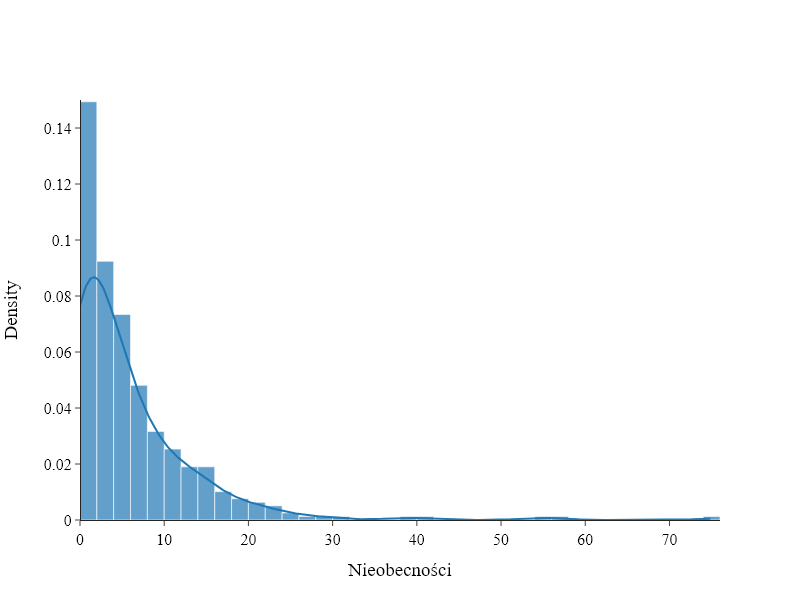

In [64]:
hist_data = [data['Nieobecności'].values.flatten().tolist()]
group_labels =['Nieobecności']
fig = ff.create_distplot(hist_data, group_labels=group_labels, show_rug=False, show_curve=True, curve_type='kde', bin_size=2)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, xaxis_title="Nieobecności",yaxis_title="Density", font=dict(family="Times New Roman",size=16,color="Black"))
fig.update_yaxes(range=[0, 0.15], autorange=False)
fig.show("png")

# **Badane modele**

W modelu przyjęto poziom istotności na poziomie: alfa=0.05

Model bazowy

In [65]:
model1 = smf.ols(formula='Wynik ~ Płeć + Miejsce_zamieszkania + Korepetycje + W_związku+ Nauka_między_2_i_5 + Nauka_między_5_i_10 + Nauka_więcej_niz_10 + Poprawki + Wychodzenie_ze_znajomymi + Alkohol + Nieobecności', data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Wynik   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     8.846
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           4.69e-14
Time:                        23:45:12   Log-Likelihood:                -1116.5
No. Observations:                 395   AIC:                             2257.
Df Residuals:                     383   BIC:                             2305.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Test RESET

In [69]:
model1 = sm.OLS(model1.model.endog, model1.model.exog).fit()
sms.linear_reset(model1, use_f=False, power=3, test_type = 'fitted')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     8.846
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           4.69e-14
Time:                        23:45:32   Log-Likelihood:                -1116.5
No. Observations:                 395   AIC:                             2257.
Df Residuals:                     383   BIC:                             2305.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2660      0.663     16.993      0.0

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.5667091585937447, p-value=0.7532526527062549, df_denom=2>

Test Breuscha - Pagana

In [67]:
residuals = model1.resid
fitted_values = model1.fittedvalues
test1 = sms.het_breuschpagan(resid=residuals, exog_het=model1.model.exog)
nam1 = ['lagrange multiplier statistic', 'p-value', 'Fvalue', 'F p-value']
lzip(nam1, test1)

[('lagrange multiplier statistic', 23.518024810137103),
 ('p-value', 0.014925496218362812),
 ('Fvalue', 2.2042923170777025),
 ('F p-value', 0.013672226875106497)]

Zatem w kolejnej iteracji trzeba będzie spróbować wyeliminować heteroskedastyczność z modelu.

Pierwsza iteracja

Podczas pierwszej iteracji skupię się przede wszystkim na wyeliminowaniu heteroskedastyczności z modelu. W tym celu zastosuje metodę od ogólnego do szczegółowego, której celem jest poprawa dopasowania modelu poprzez rozwiązanie problemu zmiennych nieistotnych w nim występujących. Stosuje się ich usunięcie, ponieważ nie wnoszą one żadnej wartości dodanej do modelu, a także wpływają na wyższą wariancję estymatora MNK. Ponadto pozytywnie przełoży się to na dokładność oszacowań parametrów zmiennych, które są istotne. Metoda ta bazuje na stopniowym narzucaniu coraz to większych ograniczeń, a dzięki niej uzyskuje się uproszczoną wersję początkowego ogólnego modelu bez nieistotnych statystycznie zmiennych.

Przy kolejności wyboru zmiennych sugerowano się wielkością p-value i wybierano je od w sposób malejący względem odnotowanej wartości. Tym samym przetestowano następujące hipotezy zerowe:


1: Beta_Alkohol = 0

2: Beta_Alkohol i Beta_Korepetycje = 0

3: Beta_Alkohol i Beta_Korepetycje i Beta_Nauka = 0

H0: Zmienne Alkohol, Korepetycje oraz Nauka są statystycznie nieistotne

H1: Przynajmniej jedna ze zmiennych Alkohol, Korepetycje lub Nauka jest statystycznie istotna

In [68]:
hip1 = '(Alkohol=0)'
print(model1.f_test(hip1))
hip2 = '(Alkohol=0), (Korepetycje=0)'
print(model1.f_test(hip2))
hip3 = '(Alkohol=0), (Korepetycje=0), (Nauka_między_2_i_5=0), (Nauka_między_5_i_10=0), (Nauka_więcej_niz_10=0)'
print(model1.f_test(hip3))

PatsyError: unrecognized token in constraint
    (Alkohol=0)
     ^

Dla każdej z badanych hipotez wychodziło nam p-value > alfa => brak podstaw do odrzucenia H0, zatem zmienne: Alkohol, Korepetycje, Nauka są statystycznie nieistotne

Dodanie każdej kolejnej zmiennej do hipotezy o braku istotności skutkowało p-value < alfa, zatem postanowiłem nie usuwać pozostałych statystycznie istotnych cech.

Zatem w kolejnej iteracji pozbywam się ich z modelu

In [ ]:
model2 = smf.ols(formula='Wynik ~ Płeć + Miejsce_zamieszkania  + W_związku + Poprawki + Wychodzenie_ze_znajomymi + Nieobecności', data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Wynik   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     14.23
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.15e-14
Time:                        14:10:35   Log-Likelihood:                -1121.9
No. Observations:                 395   AIC:                             2258.
Df Residuals:                     388   BIC:                             2286.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Pomimo usunięcia z modelu aż trzech zmiennych, skorygowany R^2 spadł jedynie o 0.012, co potwierdziło hipotezę o braku statystycznej istotności zmiennych: Alkohol, Korepetycje oraz Nauka.

Test RESET

In [ ]:
sms.linear_reset(model2, use_f=True, power=3, test_type = 'fitted')

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2.98244824]]), p=0.05183763318625756, df_denom=386, df_num=2>

Test Breuscha - Pagana

In [ ]:
residuals = model2.resid
fitted_values = model2.fittedvalues
test2 = sms.het_breuschpagan(resid=residuals, exog_het=model2.model.exog)
nam1 = ['lagrange multiplier statistic', 'p-value', 'Fvalue', 'F p-value']
lzip(nam1, test2)

[('lagrange multiplier statistic', 12.120896990489308),
 ('p-value', 0.059325451159088806),
 ('Fvalue', 2.047168412232479),
 ('F p-value', 0.05860613795736648)]

Jak możemy zauważyć na skutek usunięcia zmiennych wzrosło także p-value w teście Breuscha-Pagana na poziom 0.06, zatem brak podstaw do odrzucenia hipotezy zerowej. Zatem usunięcie zmiennych przyniosło oczekiwany efekt w postaci uzyskania homoskedastyczności.

Druga iteracja

Jak możemy zauważyć na wykresie , zmienna Nieobecności ma rozkład zbliżony do lognormalnego, w związku z tym zdecydowałem się zlogarytmować powyższą zmienną. Problemem natomiast są obserwacje, dla których zmienna Nieobecności przyjmuje wartość 0. 

In [ ]:
print("Zmienna Nieobecności przyjmuje wartość 0 dla {} obserwacji.".format(len(data[data['Nieobecności']==0])))

Zmienna Nieobecności przyjmuje wartość 0 dla 115 obserwacji.


W celu policzenia logarytmu, postanowiłem zastąpić zera wartościami 0.1

Teraz można bezpiecznie policzyć logarytm

In [ ]:
data['Nieobecności_pod_logarytm'] = data['Nieobecności'].apply(lambda x: 0.1 if x==0 else x)
data['log_Nieobecności'] = data['Nieobecności_pod_logarytm'].apply(lambda x: np.log(x))

Spójrzmy na histogram zlogarytmowanej zmiennej

In [ ]:
hist_data = [data['log_Nieobecności'].values.flatten().tolist()]
group_labels =['log_Nieobecności']
fig = ff.create_distplot(hist_data, group_labels=group_labels, show_rug=False, show_curve=True, curve_type='kde', bin_size=0.7)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, xaxis_title="log(Nieobecności)",yaxis_title="Density", font=dict(family="Times New Roman",size=16,color="Black"))
fig.update_yaxes(range=[0, 0.44], autorange=False)
fig.show("png")

Dodatkowo podczas tej iteracji postanowiłem dodać interakcję między zmiennymi: Poprawki i zlogarytmowane Nieobecności (może znajdę coś w literaturze, a jak nie to wtedy z własnych przypuszczeń)

In [ ]:
model3 = smf.ols(formula='Wynik ~ Płeć + Miejsce_zamieszkania + W_związku + Poprawki + Wychodzenie_ze_znajomymi + log_Nieobecności + Poprawki:log_Nieobecności', data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Wynik   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     21.77
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           8.84e-25
Time:                        14:10:35   Log-Likelihood:                -1095.6
No. Observations:                 395   AIC:                             2207.
Df Residuals:                     387   BIC:                             2239.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Test RESET

In [ ]:
sms.linear_reset(model3, use_f=True, power=3, test_type = 'fitted')

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.34789416]]), p=0.7063953772771033, df_denom=385, df_num=2>

Na skutek wprowadzenia do modelu zlogarytmowanej zmiennej Nieobecności oraz wprowadzenia interkacji pomiędzy wspomnianą cechą, a także zmienną Poprawki, skorygowane R^2 wzrosło z poziomu 0.168 do 0.27, a p-value dla funkcji RESET z poziomu około 5% wzrosło do 70.6%, zatem podjęta decyzja była słuszna.

TEST Bresucha - Pagana

In [ ]:
residuals = model3.resid
fitted_values = model3.fittedvalues
test3 = sms.het_breuschpagan(resid=residuals, exog_het=model3.model.exog)
nam1 = ['lagrange multiplier statistic', 'p-value', 'Fvalue', 'F p-value']
lzip(nam1, test3)

[('lagrange multiplier statistic', 46.97307672796831),
 ('p-value', 5.649919664812026e-08),
 ('Fvalue', 7.461894254294575),
 ('F p-value', 1.97359984407288e-08)]

Negatywnym skutkiem wprowadzonych modyfikacji jest utracenie założenia o homoskedastyczności, w kolejnym etapie próbą poprawy będzie usunięcie statystycznie nieistotnych zmiennych z modelu.

Trzecia iteracja

Metoda od szczegółowej do ogólnej:

1: Beta_Miejsce_zamieszkania=0

2: Beta_Miejsce_zamieszkania i Beta_W_związku=0

In [ ]:
hip4 = '(Miejsce_zamieszkania=0)'
print(model3.f_test(hip4))
hip5 = '(Miejsce_zamieszkania=0), (W_związku=0)'
print(model3.f_test(hip5))

<F test: F=array([[2.93898864]]), p=0.08726548948796334, df_denom=387, df_num=1>
<F test: F=array([[3.03071327]]), p=0.049428712754899545, df_denom=387, df_num=2>


W każdym z testów p - value (0.05) > alfa, zatem brak podstaw do odrzucenia H0. Niemniej warto zauważyć, że przy poziomie istotności wynoszącym 10% wnioskowanie uległoby zmianie.

In [ ]:
model4 = smf.ols(formula='Wynik ~ Płeć + Poprawki + Wychodzenie_ze_znajomymi + log_Nieobecności + Poprawki:log_Nieobecności', data=data).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Wynik   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     28.96
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           5.51e-25
Time:                        14:10:35   Log-Likelihood:                -1098.7
No. Observations:                 395   AIC:                             2209.
Df Residuals:                     389   BIC:                             2233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Test RESET

In [ ]:
sms.linear_reset(model4, use_f=True, power=3, test_type = 'fitted')

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.06948152]]), p=0.34419847215478205, df_denom=387, df_num=2>

Test Breuscha - Pagana

In [ ]:
residuals = model4.resid
fitted_values = model4.fittedvalues
test4 = sms.het_breuschpagan(resid=residuals, exog_het=model4.model.exog)
nam1 = ['lagrange multiplier statistic', 'p-value', 'Fvalue', 'F p-value']
lzip(nam1, test4)

[('lagrange multiplier statistic', 46.55200822047141),
 ('p-value', 7.010712688230155e-09),
 ('Fvalue', 10.393936326211465),
 ('F p-value', 2.2558991688058923e-09)]

Jak możemy zauważyć na skutek usunięcia zmiennych p - value dla zarówno testu RESET jaki i Breuscha - Pagana osiągnęło niższą wartość niż dla modelu 3. Z tego powodu postanowiłem przywrócić zmienne do modelu.

Czwarta iteracja

Przy tworzeniu ostatniej iteracji próbując rozwiązać problem heteroskedastyczności, wprowadziłem odporny estymator White'a macierzy wariancji. Pomimo tego, że błędy losowe wciąż nie są homoskedastyczne, to dzięki temu zabiegowi rozkłady statystyk są takie jak w KMRL - asymptotyczne. Pozwala to poprawnie interpretować uzyskane wyniki. 

Zatem finalny model, na którym zostaną zweryfikowane postawione hipotezy badawcze zawiera te same zmienne co w modelu 3, natomiast dodatkowo wprowadzony został odporny estymator White'a.

In [ ]:
model5 = smf.ols(formula='Wynik ~ Płeć + Miejsce_zamieszkania  + W_związku + Poprawki + Wychodzenie_ze_znajomymi + log_Nieobecności + Poprawki:log_Nieobecności', data=data).fit(cov_type = 'HC0')
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Wynik   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     21.55
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.51e-24
Time:                        14:10:36   Log-Likelihood:                -1095.6
No. Observations:                 395   AIC:                             2207.
Df Residuals:                     387   BIC:                             2239.
Df Model:                           7                                         
Covariance Type:                  HC0                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# **Podsumowanie modeli**

In [ ]:
Stargazer([model1, model2, model3, model4, model5])

# **Krytyka otrzymanych wyników**

In [ ]:
df = data[['Płeć', 'Miejsce_zamieszkania', 'W_związku', 'Poprawki', 'Wychodzenie_ze_znajomymi', 'log_Nieobecności', 'Alkohol', 'Wynik']]
df['Predictions'] = model5.predict()
df['Residuals'] = model5.resid
df['Fitted_values'] = model5.fittedvalues
df['Residuals**2'] = model5.resid**2
df.head()

,Płeć,Miejsce_zamieszkania,W_związku,Poprawki,Wychodzenie_ze_znajomymi,log_Nieobecności,Alkohol,Wynik,Predictions,Residuals,Fitted_values,Residuals**2
0,1,1,0,0,1,1.791759,0,6,10.578674,-4.578674,10.578674,20.964255
1,1,1,0,0,0,1.386294,0,6,11.717802,-5.717802,11.717802,32.693262
2,1,1,0,1,0,2.302585,1,10,10.146222,-0.146222,10.146222,0.021381
3,1,1,1,0,0,0.693147,0,15,10.780210,4.219790,10.780210,17.806625
4,1,1,0,0,0,1.386294,0,10,11.717802,-1.717802,11.717802,2.950844


**Testowanie prawidłowości formy funkcyjnej**

Test RESET

H0: forma funkcyjna jest prawidłowa (linia pasuje do punktów)

H1: Estymatory są obciążone i niezgodne

In [ ]:
sms.linear_reset(model5, use_f=True, power=3, test_type = 'fitted')

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.34789416]]), p=0.7063953772771033, df_denom=385, df_num=2>

p-value > alfa => brak podstaw do odrzucenia H0, zatem forma funkcyjna jest prawidłowa. Wyniki testu świadczą również o prawidłowości 
doboru zmiennych niezależnych.

Test CHOWA

H0: Parametry w podbróbkach są stabilne

H1: Parametry w podbróbkach nie są stabilne

Postanowiłem przeprowadzić test chowa dla osób pijących w tygodniu oraz tych, które nie spożywają alkoholu poza weekendami. 

In [ ]:
model5_pijący = smf.ols(formula = 'Wynik ~ Płeć + Miejsce_zamieszkania  + W_związku + Poprawki + Wychodzenie_ze_znajomymi + log_Nieobecności + Poprawki:log_Nieobecności', data = df[df['Alkohol'] == 1]).fit()
print(model5_pijący.summary())

                            OLS Regression Results                            
Dep. Variable:                  Wynik   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     8.842
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.29e-08
Time:                        14:10:36   Log-Likelihood:                -315.07
No. Observations:                 119   AIC:                             646.1
Df Residuals:                     111   BIC:                             668.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
model5_nie_pijący = smf.ols(formula = 'Wynik ~ Płeć + Miejsce_zamieszkania  + W_związku + Poprawki + Wychodzenie_ze_znajomymi + log_Nieobecności + Poprawki:log_Nieobecności', data = df[df['Alkohol'] == 0]).fit()
print(model5_nie_pijący.summary())

                            OLS Regression Results                            
Dep. Variable:                  Wynik   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     13.60
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           4.87e-15
Time:                        14:10:36   Log-Likelihood:                -774.92
No. Observations:                 276   AIC:                             1566.
Df Residuals:                     268   BIC:                             1595.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Teraz możemy przejść do obliczeń F-testu

In [ ]:
licznik = (model5.ssr - model5_pijący.ssr - model5_nie_pijący.ssr)/len(model5.params)*(2-1)
mianownik = (model5_pijący.ssr + model5_nie_pijący.ssr)/(model5.nobs - 2*len(model5.params))
F = licznik/mianownik
F

0.8672951825030574

Obliczamy obszar krytyczny

In [ ]:
scipy.stats.f.ppf(q=1-0.05, dfn=len(model5.params)*(2-1), dfd =(model5.nobs - 2*len(model5.params)))

1.9628481696518463

F_test: 0.867; Obszar krytyczny: (1.963, +inf) Zatem nasza statystyka nie wpada do obszaru krytycznego, czyli brak podstaw do odrzucenia H0. 

Wniosek: Parametry w podbrókach osób spożywających alkohol w tygodniu oraz tych, które nie piją między poniedziałkiem a piątkiem są stabilne.

**Homoskedastyczność**

W celu zbadania homoskedastyczności modelu utworzony został wykres zależności między wartościami dopasowanymi oraz resztami.

In [ ]:
fig = px.scatter(x=df['Fitted_values'], y=df['Residuals'],labels={"x": "Fitted values",  "y": "Residuals"},trendline="lowess",trendline_color_override="green")
fig.add_shape(type="line", line_color="red", line_width=2, opacity=0.5, line_dash="dash",x0=0, x1=1, xref="paper", y0=0, y1=0, yref="y")
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, xaxis_title="Fitted values",yaxis_title="Residuals", font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

O homosekdastyczności występującej w naszym modelu możemy mówić, gdy wykres przedsatwia stosunkowo równo rozłożone punkty względem linii wyznaczającej zero, czyli homoskedastyczność zachodzi, gdy wariancja punktów od zera jest mniej więcej równa.

Jak możemy zauważyć na powyższym wykresie nasze punkty nie są rozłożone równomiernie co świadczy o heteroskedastyczności.

W celu weryfikacji tego założenia przeprowadziłem dwa testy:

- Test Breuscha - Pagana

H0: Reszty mają stały rozrzut (homoskedastyczność)

H1: Σ^ obciążone i niezgodne (heteroskedastyczność)

In [ ]:
test5 = sms.het_breuschpagan(resid=df['Residuals'], exog_het=model5.model.exog)
nam1 = ['lagrange multiplier statistic', 'p-value', 'Fvalue', 'F p-value']
lzip(nam1, test5)

[('lagrange multiplier statistic', 46.97307672796831),
 ('p-value', 5.649919664812026e-08),
 ('Fvalue', 7.461894254294575),
 ('F p-value', 1.97359984407288e-08)]

Nieska wartość prawdopodobieństwa (p-value=0.000) nakazuje odrzucić hipotezę zerową o homoskedastyczności.

- Test White'a

In [ ]:
test6 = sms.het_white(df['Residuals'], model5.model.exog)
lzip(nam1, test6)

[('lagrange multiplier statistic', 81.90696454410218),
 ('p-value', 1.935095028179216e-07),
 ('Fvalue', 3.555901516374454),
 ('F p-value', 2.103860646457054e-08)]

Test White’a również odrzuca hipotezę zerową o stałości 
wariancji składnika resztowego, biorąc pod 
uwagę przyjęty poziom istotności alfa = 0.05.

Próba znalezienia zmiennych odpowiedzialnych za heteroskedastyczność 

In [ ]:
X = df[["Płeć", "Miejsce_zamieszkania", "W_związku", "Poprawki", "Wychodzenie_ze_znajomymi", "log_Nieobecności"]]
y = df[['Residuals**2']]
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
feature_names = X.columns.tolist()
X_with_interactions = pd.DataFrame(interaction.fit_transform(X), columns=interaction.get_feature_names_out(input_features=feature_names))
X = sm.add_constant(X_with_interactions)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Residuals**2   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     3.986
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.19e-08
Time:                        14:10:36   Log-Likelihood:                -1771.0
No. Observations:                 395   AIC:                             3588.
Df Residuals:                     372   BIC:                             3680.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Tak naprawdę jedynie pojedyncze zmienne nie uległyby odrzuceniu, zatem można stąd wnioskować, że nie udało się znaleźć zmiennych, które odpowiadają za heteroskedastyczność.

Heteroskedastyczność modelu stanowi znaczący problem. Estymatory mogą być nieobciążone oraz zgodne, ale nieefektywne. Ponadto istnieje możliwość, że wariancje estymatora składnika losowego są obciążone. Jednym ze skutków braku homoskedastyczności modelu jest błędne wnioskowanie statystyczne. 

Pomimo próby naprawienia tego problemu (metoda od ogólnego do szczegółowego) nie otrzymano zadowalających rezultatów. Tym samym zdecydowałem się na opisane w Rozdziale X zastosowanie regresji z odporną macierzą wariancji - kowariancji White'a. 

Porównując ze sobą Modele 3 i 5 możemy zauważyć, że nie nastąpiła zmiana w wynikach estymacji, ale rzeczywiste błędy standardowe uległy zmianie względem standardowej procedury (Model 3). 

Jednym ze sposobów na pozbycie się problemu heteroskedastyczności jest wyszukanie przy pomocy testu White'a zmiennych, które je powodują. Niestety próba ta nie powiodła się i nie udało znaleźć się cech odpowiedzialnych za występowanie heteroskedastyczności.



**Autokorelacja reszt**

Niespełnienie powyższego założenia prowadzi do niesferyczności reszt i konsekwencje są takie, jak w przypadku braku spełnienia założenia o homoskedastyczności opisanej powyżej.

H0: Brak autokorelacji reszt

H1: Istnieje autokorelacja reszt

In [ ]:
test7 = sms.acorr_breusch_godfrey(model5)
lzip(nam1, test7)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:826: FutureWarning:

The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setnlags or period to silence this warning.



[('lagrange multiplier statistic', 13.888792527620428),
 ('p-value', 0.6069983344847139),
 ('Fvalue', 0.8450194337502851),
 ('F p-value', 0.6337867562971135)]

p-value = 0.607 > alfa => brak podstaw do odrzucenia H0, zatem w modelu nie występuje autokorelacja błędu losowego.



**Nielosowość zmiennych objaśniających**

Z powodu braku odpowiednich narzędzi ekonometrycznych nie byłem w stanie dokonać diagnozy powyższego założenia. 

Ze względu na fakt, iż nielosowość zmiennych objaśniających w modelu jest potrzebna do udowodnienia nieobciążoności estymatora MNK przyjąłem, że powyższe założenie jest spełnione

**Wartość oczekiwana składnika losowego wynosi zero**

Ostatnim założeniem klasycznego modelu regresji liniowej dotyczy wartości oczekiwanej błędu losowego, która dla każdej obserwacji przyjmuje wartość zero. Pomimo braku przeprowadzonych testów diagnostycznych, warto opisać przyczyny oraz konsekwencje jakie niesie za sobą brak spełnienia powyższego założenia. 

Jedną z podstawowych przyczyn wartości oczekiwanej składnika losowego róznej od zera jest sytuacja, gdy zmienna, która nie została ujęta w modelu jest skorelowana zarówno ze zmienną zależną, jak i niezależną. Zatem założenie to wyklucza możliwość pominięcia jakiejkolwiek zmiennej z modelu.

Problem ten może prowadzić do przeszacowania lub niedoszacowania estymatorów modelu. Występuje ono, gdy zmienna, która nie została ujęta w modelu jest 
zarówno skorelowana ze zmienną zależną jak i inną zmienną niezależną. Poważniejszą konsekwencją jest błędne wskazanie przez model, że jakaś zmienna jest statystycznie istotna, podczas gdy w rzeczywistości - nie jest. 

Nimemniej w związku z brakiem możliwości przeprowadzenia testu, tak samo jak w przypadku nielosowości zmiennych objaśniających, przyjąłem że powyższe założenie jest spełnione.

**Dodatkowe założenie na normalność składnika losowego**

W celu weryfikacji hipotezy o danym rozkładzie dla składnika losowego: ε_i~N(0,σ^2) rozpocznę od analizy graficznej

Histogram rozkładu reszt

In [ ]:
hist_data = [df['Residuals'].values.flatten().tolist()]
group_labels =['Residuals']
fig = ff.create_distplot(hist_data, group_labels=group_labels, show_rug=False, curve_type='kde', bin_size=1)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, xaxis_title="Residuals",yaxis_title="Density", font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

Wykres kwantylowy reszt

In [ ]:
qqplot_data = qqplot(df['Residuals'], line='s').gca().lines
plt.clf()
fig = go.Figure()
fig.add_trace({'type': 'scatter','x': qqplot_data[0].get_xdata(),'y': qqplot_data[0].get_ydata(), 'mode': 'markers', 'marker': {'color': 'blue'}})
fig.add_trace({'type': 'scatter','x': qqplot_data[1].get_xdata(),'y': qqplot_data[1].get_ydata(),'mode': 'lines','line': {'color': 'black'}})
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, xaxis_title="Theoritical Quantities",yaxis_title="Sample Quantities", font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

<Figure size 432x288 with 0 Axes>

Wykres pudełkowy

In [ ]:
fig = px.box(df, y="Residuals")
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, yaxis_title="Sample Residuals", font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

Na histogramie reszt możemy zauważyć, że rozkład nie przypomina rozkładu normalnego. Ponadto wykres pudełkowy wskazuje na występowanie wartości odstających szczególnie przy lewym ogonie. Mówiąc o rozkładzie normalnym reszt należałoby oczekiwać, że na wykresie kwantylowym punkty będą pokrywały się z linią o nachyleniu 45 stopni. Jak możemy jednak zauważyć szczególnie przy lewym oraz prawym ogonie wartości w znacznym stopniu odstają od linii, co także może sugerować, że reszty nie mają rozkładu normalnego 

Dla znacznej liczby obserwacji problem braku normalności 
składnika losowego nie jest istotny, ponieważ rozkłady statystyk są bliskie standardowym 
rozkładom, nawet jeśli założenie to nie jest spełnione

W celu weryfikacji przeprowadzonej przeze mnie analizy graficznej wykonałem także test Jarque-Bera.

H0: Reszty mają rozkład normalny ε_i~N(0,σ^2)

H1: Reszty nie posiadają rozkładu normalnego 

In [ ]:
test5 = sms.jarque_bera(model5.resid)
nam2 = ['The Jarque-Bera test statistic', 'The pvalue of the test statistic.', 'skew', 'kurtosis']
lzip(nam2, test5)

[('The Jarque-Bera test statistic', 14.335030263999242),
 ('The pvalue of the test statistic.', 0.0007712367737505346),
 ('skew', -0.38941620736233246),
 ('kurtosis', 3.5142074001524772)]

p-value = 0 < alfa => zatem odrzucona została hipoteza zerowa o normalności błędu losowego na rzecz hipotezy alternatywnej o braku takiej normalności. 

Należy jednakże pamiętać, że nawet w przypadku, gdy błędy losowe nie posiadają  rozkładu 
normalnego to estymator MNK 
jest nadal najlepszym liniowym i nieobciążonym estymatorem. Mogą istnieć jedynie estymatory nieliniowe charakteryzujące się większą efektywnością od estymatorów MNK.

# **Problemy z danymi**

Współliniowość

W celu zbadania czy w modelu występuje niedokładna współliniowość obliczyłem statystykę VIF

In [ ]:
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = np.round(vif, 3)

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = np.round(tolerance, 3)
    vif_dict['Średnia'] = np.round(np.mean(list(vif_dict.values())), 3)
    tolerance_dict['Średnia'] = np.round(np.mean(list(tolerance_dict.values())), 3)
    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif


In [ ]:
#exogs - analizowane zmienne
exogs = model5.params.index.tolist()
exogs.pop(0)
get_vif(exogs, data=df)

,VIF,Tolerance
Płeć,1.019,0.981
Miejsce_zamieszkania,1.024,0.977
W_związku,1.025,0.976
Poprawki,1.169,0.855
Wychodzenie_ze_znajomymi,1.032,0.969
log_Nieobecności,1.372,0.729
Poprawki:log_Nieobecności,1.495,0.669
Średnia,1.162,0.879


Przyjęte zostało, że dla staytystyki VIF przekraczającej wartość 10 możemy mówić o problemie niedokładnej współliniowości. Rezultaty przedstawione w powyższej tabeli nie wskazują, aby w modelu występował problem współliniowości. Najwyższa wartość tej statystyki obliczona została dla zmiennej Poprawki:log_Nieobecności i wynosi 1.495, zatem znacznie mniej niż graniczny poziom 10. 

Jeżeli w modelu występowała by niedokładna współliniowość zaburzyłaby precyzję estymacji. Rozwiązaniem tego problemu jest usunięcie zmiennej, dla której statystyka VIF > 10, niemniej przed tym krokiem należałoby zweryfikować istotność danej cechy, a także dokonać przeglądu literatury. 

Oszacowania nietypowe i błędne

In [ ]:
influence = model5.get_influence()
inf_sum = influence.summary_frame()
h_lev = (2*len(model5.params))/model5.nobs
print("Liczba obserwacji odstających na podstawie dźwigni: {}".format(len(inf_sum.loc[inf_sum['hat_diag'] > h_lev])))
print("Liczba obserwacji odstających na podstawie standaryzowanych reszt: {}".format(len(inf_sum.loc[(inf_sum['standard_resid'] > 2) | (inf_sum['standard_resid'] < -2)])))
print("Liczba obserwacji odstających na podstawie odległości Cooka: {}".format(len(inf_sum.loc[inf_sum['cooks_d'] > 4/model5.nobs])))
print("Liczba obserwacji odstających na podstawie wszystkich tzrech warunków: {}".format(len(inf_sum.loc[(inf_sum['hat_diag'] > h_lev) & ((inf_sum['standard_resid'] > 2) | (inf_sum['standard_resid'] < -2)) & (inf_sum['cooks_d'] > 4/model5.nobs)])))

Liczba obserwacji odstających na podstawie dźwigni: 29
Liczba obserwacji odstających na podstawie standaryzowanych reszt: 22
Liczba obserwacji odstających na podstawie odległości Cooka: 26
Liczba obserwacji odstających na podstawie wszystkich tzrech warunków: 2


Aby zweryfikować, czy w modelu występują obserwacje błędne lub nietypowe wykorzystałem trzy miary: 

- Dźwignia, która używana jest do stwierdzenia czy wektor zmiennych niezależnych x_i dla i-tej obserwacji jest nietypowy na tle pozostałych rekordów. Przyjąłem, że obserwacje nazwiemy nietypową, gdy wektor ją opisujący jest większy niż 2*k/N (gdzie k - liczba zmiennych, N - liczba obserwacji). W modelu wykryto 29 obserwacji odstających na podstawie dźwignii. 

- Standaryzowane reszty, dla której obserwacje uznaje się za nietyową, gdy |ε_i(z daszkiem)|>2. Dana nierówność spełniona została dla 22 rekordów

- Odległość Cooka mierząca wpływ pojedynczej obserwacji na wyniki regresji. Gdy miara przekroczy wartość 4/N należy dogłębniej przeanalizować dany rekord. Obserwacji odtsających na podstawie odległości Cooka jest 26.

W poniższej pracy podjąłem decyzje, aby badać jedynie te obserwacje, które spełniły każdy z powyższych trzech warunków, tym samym wykryłem w modelu dwa takie rekordy. 

In [ ]:
df.iloc[[138, 308], :]

,Płeć,Miejsce_zamieszkania,W_związku,Poprawki,Wychodzenie_ze_znajomymi,log_Nieobecności,Alkohol,Wynik,Predictions,Residuals,Fitted_values,Residuals**2
138,0,1,1,1,1,-2.302585,0,12,2.448318,9.551682,2.448318,91.234624
308,0,0,1,1,0,-2.302585,0,12,2.870529,9.129471,2.870529,83.347240


Obydwie obserwacje charakteryzują uczniów, których liczba nieobecności wynosiła 0. Zatem dla finalnego modelu na skutek wprowadzonej transformacji opisanej w rozdziale X, logarytm tej zmiennej przyjmował wartości ujemne.  

In [ ]:
df_proba = df.copy()
df_proba.drop(index=[138,308], inplace=True)
model6 = smf.ols(formula='Wynik ~ Płeć + Miejsce_zamieszkania  + W_związku + Poprawki + Wychodzenie_ze_znajomymi + log_Nieobecności + Poprawki:log_Nieobecności', data=df_proba).fit(cov_type = 'HC0')
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Wynik   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     31.86
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           8.34e-35
Time:                        14:10:37   Log-Likelihood:                -1084.6
No. Observations:                 393   AIC:                             2185.
Df Residuals:                     385   BIC:                             2217.
Df Model:                           7                                         
Covariance Type:                  HC0                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Usunięcie obserwacji z modelu poskutkowało wzrostem skorygowanego R^2 do poziomu 0.292. Mając jednak na uwadzę, że obserwacje nie są błędne pod względem zawartch w nich informacji, a nietypowość może wynikać z wprowadzonego przeze mnie przekształcenia, zdecydowałem pozostawić je w moim zbiorze.

Poniżej znajduje się wykres zależności dźwignii oraz standaryzowanych reszt.

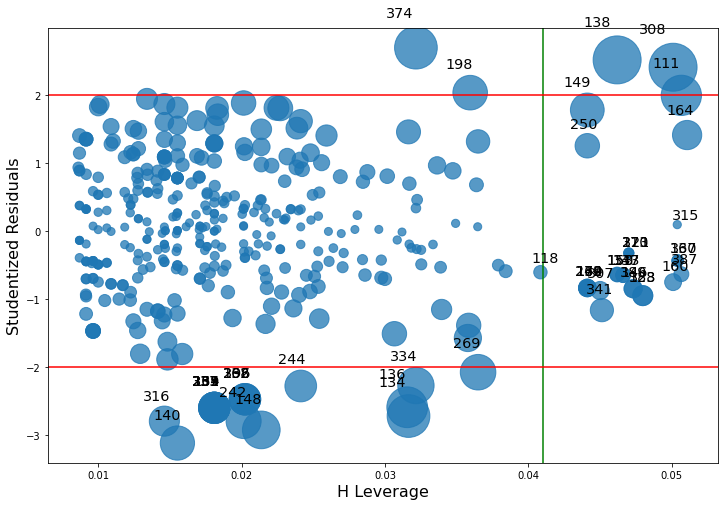

In [ ]:
plt.rc('figure', figsize=(12, 8))
sm.graphics.influence_plot(model5, criterion='Cooks')
axvline(x=round(h_lev, 3), color='g')
#Przyjęło się, że standaryzowane reszty, nie powinny przekraczać: 2
axhline(y=2, color='r')
axhline(y=-2, color='r')
plt.title('')
plt.show()

# **Interpretacja wyników**

Test na łączną nieistotność zmiennych

In [ ]:
TSS = model5.centered_tss
RSS = model5.ssr
g = len(model5.params)-1
N = model5.nobs
k = len(model5.params)
licznik = (TSS-RSS)/g
mianownik = RSS/(N-k)
F_test = licznik/mianownik
print(F_test)
#Obszar_krytyczny = F(g;N-k) = F(7; 387) = 2.03
#Wpada do obszaru krytycznego, zatem odrzucamy hipotezę zerową o łącznej nieistotności zmiennych w modelu.

21.769308392026176


# **Załącznik**

a) Wstępna analiza danych

Macierz korelacji zmiennych

In [ ]:
corr = np.round(data[['Płeć', 'Miejsce_zamieszkania', 'Korepetycje', 'W_związku', 'Nauka', 'Poprawki', 'Wychodzenie_ze_znajomymi', 'Alkohol', 'Nieobecności', 'Wynik']].corr(), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)

fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.diverging.RdBu,
                                  hoverinfo="none", #Shows hoverinfo for null values
                                  showscale=True, ygap=1, xgap=1
                                 )

fig.update_xaxes(side="bottom")

fig.update_layout(
    width=1200, 
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white',
    font=dict(family="Times New Roman",size=12,color="Black")
)

# NaN values are not handled automatically and are displayed in the figure
# So we need to get rid of the text manually
for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show("png")

Wartość współczynnika korelacji pomiędzy poszczególnymi zmiennymi nie wykazuje znaczącej zależności. Jedynie korelacja pomiędzy zmiennymi Poprawki oraz Wynik wynosząca -0.355 może budzić podejrzenia. Literatura  sugeruje, że poprawianie przedmiotu przez studenta ma negatywny wpływ na przyszły wynik z egzaminu. Ze względu na niewielką wartość korelacji, a także szeroko omawianą w literaturze statystyczną istotność tej zmiennej, postanowiłem zachować ją w modelu.

b) Analiza zmiennych binarnych i dyskretnych

Płeć 

In [ ]:
print("Kobiety:")
print(np.round(data.loc[data["Płeć"] == 1, "Wynik"].describe(), 3))
print("Mężczyźni:")
print(np.round(data.loc[data["Płeć"] == 0, "Wynik"].describe(), 3))

Kobiety:
count    208.000
mean       9.966
std        4.622
min        0.000
25%        8.000
50%       10.000
75%       13.000
max       19.000
Name: Wynik, dtype: float64
Mężczyźni:
count    187.000
mean      10.914
std        4.495
min        0.000
25%        9.000
50%       11.000
75%       14.000
max       20.000
Name: Wynik, dtype: float64


Średnio mężczyźni uzyskali lepsze wyniki od kobiet.

Wykres pudełkowy Wyników dla zmiennej niezależnej Płeć 

In [ ]:
labels = [["Mężczyzna"], ["Kobieta"]]
fig = px.box(data_frame = data,x = 'Płeć', y='Wynik')
fig.update_xaxes(tickvals=np.arange(2), ticktext=labels)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

ANOVA

In [ ]:
model = ols('Wynik ~ C(Płeć)', data=data).fit()
anova_table = np.round(sm.stats.anova_lm(model, typ=2), 3)
anova_table

,sum_sq,df,F,PR(>F)
C(Płeć),88.513,1.0,4.252,0.04
Residual,8181.395,393.0,NaN,NaN


Na podstawie testu ANOVA ze statystyką testową F=4.252 przy odpowiadającym jej pvalue=0.04 na przyjętym poziomie istotności 5%, odrzucono hipotezę zerową o równości średnich wyników dla różnych płci na korzyść hipotezy alternatywnej, że średni wynik dla każdej z płci jest różny.  Zasadność wykorzystania powyższej zmiennej w modelu została potwierdzona przez literaturę, analizę statystyczną oraz graficzną.

Miejsce_zamieszkania

In [ ]:
print("Miasto:")
print(np.round(data.loc[data["Miejsce_zamieszkania"] == 1, "Wynik"].describe(), 3))
print("Tereny wiejskie:")
print(np.round(data.loc[data["Miejsce_zamieszkania"] == 0, "Wynik"].describe(), 3))

Miasto:
count    307.000
mean      10.674
std        4.563
min        0.000
25%        9.000
50%       11.000
75%       14.000
max       20.000
Name: Wynik, dtype: float64
Tereny wiejskie:
count    88.000
mean      9.511
std       4.556
min       0.000
25%       7.000
50%      10.000
75%      12.000
max      19.000
Name: Wynik, dtype: float64


Przeciętnie lepsze wyniki uzyskały osoby zamieszkujące tereny miejskie. Należy jednak mieć na uwadzę, że jest duża dysproporcja jeśli chodzi o liczebność każdej grupy w analizowanym zbiorze danych

Wykres pudełkowy Wyników dla zmiennej objaśniającej - Miejsce_zamieszkania

In [ ]:
labels = [["Tereny wiejskie"], ["Miasto"]]
fig = px.box(data_frame = data,x = 'Miejsce_zamieszkania', y='Wynik')
fig.update_xaxes(tickvals=np.arange(2), ticktext=labels)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

ANOVA

In [ ]:
model = ols('Wynik ~ C(Miejsce_zamieszkania)', data=data).fit()
anova_table = np.round(sm.stats.anova_lm(model, typ=2), 3)
anova_table

,sum_sq,df,F,PR(>F)
C(Miejsce_zamieszkania),92.494,1.0,4.445,0.036
Residual,8177.415,393.0,NaN,NaN


Na podstawie testu ANOVA ze statystyką testową F=4.445 przy odpowiadającym jej pvalue=0.036 na przyjętym poziomie istotności 5%, odrzucono hipotezę zerową o równości średnich wyników dla różnych terenów zamieszkiwanych przez uczniów. Zasadność wykorzystania powyższej zmiennej w modelu została potwierdzona przez literaturę, analizę statystyczną oraz graficzną.

Korepetycje

In [ ]:
print("Korepetycje:")
print(np.round(data.loc[data["Korepetycje"] == 1, "Wynik"].describe(), 3))
print("Brak Korepetycji:")
print(np.round(data.loc[data["Korepetycje"] == 0, "Wynik"].describe(), 3))

Korepetycje:
count    51.000
mean      9.431
std       2.865
min       0.000
25%       8.000
50%      10.000
75%      11.000
max      17.000
Name: Wynik, dtype: float64
Brak Korepetycji:
count    344.000
mean      10.561
std        4.770
min        0.000
25%        9.000
50%       11.000
75%       14.000
max       20.000
Name: Wynik, dtype: float64


Średnie wyniki uzyskiwane przez osoby uczęszczające na korepetycje są o ponad punkt niższe względem respondentów nie biorących udziału w pozaszkolnych pomocach naukowych. Należy jednak zwrócić uwagę, że tak samo jak w przypadku zmiennej: Miejsce_zamieszkania, tutaj również mamy dysproporcję liczebności każdej z podgrup, co może zaburzać wnioskowanie z otrzymanych wyników.

Wykres pudełkowy Wyników dla zmiennej objaśniającej - Korepetycje

In [ ]:
labels = [["Brak Korepetycji"], ["Korepetycje"]]
fig = px.box(data_frame = data,x = 'Korepetycje', y='Wynik')
fig.update_xaxes(tickvals=np.arange(2), ticktext=labels)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

ANOVA

In [ ]:
model = ols('Wynik ~ C(Korepetycje)', data=data).fit()
anova_table = np.round(sm.stats.anova_lm(model, typ=2), 3)
anova_table

,sum_sq,df,F,PR(>F)
C(Korepetycje),56.681,1.0,2.712,0.1
Residual,8213.228,393.0,NaN,NaN


Na podstawie testu ANOVA ze statystyką testową F=2.712 przy odpowiadającym jej pvalue=0.1 na przyjętym poziomie istotności 5%, nie było podstaw do odrzuconia hipotezy zerowej o równości średnich wyników dla uczniów, którzy uczęszczali na korepetycje i przypadku przeciwnego. Mając na uwadzę powyższy rezultat, a także brak statystycznej istotności zmiennej w modelu bazowym, została ona usunięta podczas kolejnych iteracji.

W_związku

In [ ]:
print("W związku:")
print(np.round(data.loc[data["W_związku"] == 1, "Wynik"].describe(), 3))
print("Single:")
print(np.round(data.loc[data["W_związku"] == 0, "Wynik"].describe(), 3))

W związku:
count    132.000
mean       9.576
std        4.857
min        0.000
25%        8.000
50%       11.000
75%       13.000
max       18.000
Name: Wynik, dtype: float64
Single:
count    263.000
mean      10.837
std        4.386
min        0.000
25%        9.000
50%       11.000
75%       14.000
max       20.000
Name: Wynik, dtype: float64


Średnie wyniki uzyskiwane przez uczniów będących w związku są o ponad punkt niższe niż te uzyskane przez respondentów deklarujących się jako single. Jeżeli spojrzymy jednak na medianę to możemy zauważyć, że w obydwu grupach przyjmowana jest taka sama wartość.

Wykres pudełkowy Wyników dla zmiennej objaśniającej - W_związku

In [ ]:
labels = [["Single"], ["W związku"]]
fig = px.box(data_frame = data,x = 'W_związku', y='Wynik')
fig.update_xaxes(tickvals=np.arange(2), ticktext=labels)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

ANOVA

In [ ]:
model = ols('Wynik ~ C(W_związku)', data=data).fit()
anova_table = np.round(sm.stats.anova_lm(model, typ=2), 3)
anova_table

,sum_sq,df,F,PR(>F)
C(W_związku),139.697,1.0,6.753,0.01
Residual,8130.212,393.0,NaN,NaN


Na podstawie testu ANOVA ze statystyką testową F=6.753 przy odpowiadającym jej pvalue=0.01 na przyjętym poziomie istotności 5%, odrzucono hipotezę zerową o równości średnich wyników dla osób deklarujących się jako single oraz tych będących w związku na rzecz hipotezy alternatywnej o równości średnich w badanych podgrupach. Zasadność wykorzystania powyższej zmiennej w modelu została potwierdzona przez analizę statystyczną oraz graficzną.

Nauka

In [ ]:
print("Nauka_mniej_niz_2:")
print(np.round(data.loc[data["Nauka"] == 1, "Wynik"].describe(), 3))
print("Nauka_między_2_i_5:")
print(np.round(data.loc[data["Nauka"] == 2, "Wynik"].describe(), 3))
print("Nauka_między_5_i_10:")
print(np.round(data.loc[data["Nauka"] == 3, "Wynik"].describe(), 3))
print("Nauka_więcej_niz_10")
print(np.round(data.loc[data["Nauka"] == 4, "Wynik"].describe(), 3))

Nauka_mniej_niz_2:
count    105.000
mean      10.048
std        4.956
min        0.000
25%        8.000
50%       10.000
75%       13.000
max       19.000
Name: Wynik, dtype: float64
Nauka_między_2_i_5:
count    198.000
mean      10.172
std        4.218
min        0.000
25%        8.000
50%       11.000
75%       13.000
max       19.000
Name: Wynik, dtype: float64
Nauka_między_5_i_10:
count    65.00
mean     11.40
std       4.64
min       0.00
25%      10.00
50%      12.00
75%      15.00
max      19.00
Name: Wynik, dtype: float64
Nauka_więcej_niz_10
count    27.000
mean     11.259
std       5.281
min       0.000
25%       9.000
50%      12.000
75%      14.500
max      20.000
Name: Wynik, dtype: float64


Wyraźnie widoczny jest wzrost (do pewnego momentu) średniego wyniku z finalnego testu wraz ze wzrostem liczby godzin przeznaczanych na naukę w ciągu tygodnia. Osoby, które zadeklarowały, że uczyły się więcej niż 10 godzin tygodniowo uzyskały niższy wynik od tych, które przeznaczały na to między 5 a 10 godzin co może wynikać z niewielkiej liczby obserwacji, a także ze względu na fakt, iż osoby o mniejszych umiejętnościach przyswajania wiedzy są zmuszone przeznaczać więcej czasu na naukę, co i tak niekoniecznie przynosi efekty.  

Wykres pudełkowy Wyników dla zmiennej objaśniającej - Nauka

In [ ]:
labels = [["x"], ["Nauka_mniej_niz_2"], ["Nauka_między_2_i_5"], ["Nauka_między_5_i_10"], ["Nauka_więcej_niz_10"]]
fig = px.box(data_frame = data, x = 'Nauka', y='Wynik')
fig.update_xaxes(tickvals=np.arange(5), ticktext=labels)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

ANOVA

In [ ]:
model = ols('Wynik ~ C(Nauka)', data=data).fit()
anova_table = np.round(sm.stats.anova_lm(model, typ=2), 3)
anova_table

,sum_sq,df,F,PR(>F)
C(Nauka),108.200,3.0,1.728,0.161
Residual,8161.709,391.0,NaN,NaN


Na podstawie testu ANOVA ze statystyką testową F=1.728 przy odpowiadającym jej pvalue=0.161 na przyjętym poziomie istotności 5%, nie było podstaw do odrzuconia hipotezy zerowej o równości średnich wyników dla respondentów deklarujących różną liczbę godzin przeznaczanych na naukę w ciągu tygodnia. Mając na uwadzę powyższy rezultat, a także brak statystycznej istotności rozkodowanych zmiennych w modelu bazowym, cecha została usunięta podczas kolejnych iteracji.

Poprawki

In [ ]:
print("Poprawki:")
print(np.round(data.loc[data["Poprawki"] == 1, "Wynik"].describe(), 3))
print("Brak poprawki:")
print(np.round(data.loc[data["Poprawki"] == 0, "Wynik"].describe(), 3))

Poprawki:
count    83.000
mean      7.265
std       4.711
min       0.000
25%       4.500
50%       8.000
75%      10.000
max      18.000
Name: Wynik, dtype: float64
Brak poprawki:
count    312.000
mean      11.253
std        4.170
min        0.000
25%        9.750
50%       11.000
75%       14.000
max       20.000
Name: Wynik, dtype: float64


Wyraźnie widzimy, że osoby, które nie miały żadnej poprawki napisały przeciętnie znacznie lepiej egzamin względem uczniów, którzy mieli chociaż jedną poprawkę.

Wykres pudełkowy Wyników dla zmiennej objaśniającej - Poprawki

In [ ]:
labels = [["Brak poprawek"], ["Poprawki"]]
fig = px.box(data_frame = data,x = 'Poprawki', y='Wynik')
fig.update_xaxes(tickvals=np.arange(2), ticktext=labels)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

ANOVA

In [ ]:
model = ols('Wynik ~ C(Poprawki)', data=data).fit()
anova_table = np.round(sm.stats.anova_lm(model, typ=2), 3)
anova_table

,sum_sq,df,F,PR(>F)
C(Poprawki),1042.743,1.0,56.702,0.0
Residual,7227.165,393.0,NaN,NaN


Na podstawie testu ANOVA ze statystyką testową F=56.702 przy odpowiadającym jej pvalue=0 na przyjętym poziomie istotności 5%, odrzucono hipotezę zerową o równości średnich wyników z testu dla poprawkowiczów i uczniów bez poprawki, na rzecz hipotezy alternatywnej o równości średnich w badanych podgrupach. Zasadność wykorzystania powyższej zmiennej w modelu została potwierdzona przez liczną literaturę omówioną w niniejszej pracy, a także analizę statystyczną oraz graficzną. 

Wychodzenie_ze_znajomymi

In [ ]:
print("Częste Wychodzenie_ze_znajomymi:")
print(np.round(data.loc[data["Wychodzenie_ze_znajomymi"] == 1, "Wynik"].describe(), 3))
print("Rzadkie wychodzenia ze znajomymi:")
print(np.round(data.loc[data["Wychodzenie_ze_znajomymi"] == 0, "Wynik"].describe(), 3))

Częste Wychodzenie_ze_znajomymi:
count    139.000
mean       9.417
std        4.672
min        0.000
25%        8.000
50%       10.000
75%       13.000
max       19.000
Name: Wynik, dtype: float64
Rzadkie wychodzenia ze znajomymi:
count    256.000
mean      10.957
std        4.448
min        0.000
25%        9.000
50%       11.000
75%       14.000
max       20.000
Name: Wynik, dtype: float64


Sugerując się powyższą tabelą uczniowie rzadziej wychodzący ze znajomymi osiągnęli przeciętnie lepsze rezultaty.

Wykres pudełkowy Wyników dla zmiennej objaśniającej - Wychodzenie_ze_znajomymi

In [ ]:
labels = [["Rzadkie wychodzenie ze znajomymi"], ["Częste wychodzenie ze znajomymi"]]
fig = px.box(data_frame = data,x = 'Wychodzenie_ze_znajomymi', y='Wynik')
fig.update_xaxes(tickvals=np.arange(2), ticktext=labels)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

ANOVA

In [ ]:
model = ols('Wynik ~ C(Wychodzenie_ze_znajomymi)', data=data).fit()
anova_table = np.round(sm.stats.anova_lm(model, typ=2), 3)
anova_table

,sum_sq,df,F,PR(>F)
C(Wychodzenie_ze_znajomymi),213.583,1.0,10.419,0.001
Residual,8056.326,393.0,NaN,NaN


Na podstawie testu ANOVA ze statystyką testową F=10.419 przy odpowiadającym jej pvalue=0.001 na przyjętym poziomie istotności 5%, odrzucono hipotezę zerową o równości średnich wyników dla grup studentów podzielonych względem ich częstotliwości wychodzenia ze znajomymi. Zasadność wykorzystania powyższej zmiennej w modelu została potwierdzona przez analizę statystyczną oraz graficzną.

Alkohol

In [ ]:
print("Alkohol w tygodniu:")
print(np.round(data.loc[data["Alkohol"] == 1, "Wynik"].describe(), 3))
print("Brak alkoholu w tygodniu:")
print(np.round(data.loc[data["Alkohol"] == 0, "Wynik"].describe(), 3))

Alkohol w tygodniu:
count    119.000
mean       9.681
std        4.282
min        0.000
25%        8.000
50%       10.000
75%       12.000
max       18.000
Name: Wynik, dtype: float64
Brak alkoholu w tygodniu:
count    276.000
mean      10.732
std        4.677
min        0.000
25%        9.000
50%       11.000
75%       14.000
max       20.000
Name: Wynik, dtype: float64


Osób, które nie spożywały alkoholu w tygodniu było ponad dwukrotnie więcej od tych konsumujących, a także uzyskały one średnio o 1 punkt więcej z testu końcowego.

Wykres pudełkowy Wyników dla zmiennej objaśniającej - Alkohol

In [ ]:
labels = [["Brak alkoholu w tygodniu"], ["Alkohol w tygodniu"]]
fig = px.box(data_frame = data,x = 'Alkohol', y='Wynik')
fig.update_xaxes(tickvals=np.arange(2), ticktext=labels)
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

ANOVA

In [ ]:
model = ols('Wynik ~ C(Alkohol)', data=data).fit()
anova_table = np.round(sm.stats.anova_lm(model, typ=2), 3)
anova_table

,sum_sq,df,F,PR(>F)
C(Alkohol),91.884,1.0,4.416,0.036
Residual,8178.025,393.0,NaN,NaN


Na podstawie testu ANOVA ze statystyką testową F=4.416 przy odpowiadającym jej pvalue=0.036 na przyjętym poziomie istotności 5%, odrzuciłem hipotezę zerową na rzecz hipotezy alternatywnej, mówiącej o różnych średnich wynikach w grupach uczniów spożywających alkohol w tygodniu oraz tych, którzy się do tego nie przyznali. Mając jednak na uwadzę fakt iż zmienna Alkohol była statystycznie nieistotna (co potwierdziła metoda od szczegółowego do ogólnego) w modelu bazowym, a także literatura podważała wpływ tej cechy na wyniki uczniów postanowiłem usunąć zmienną z modelu podczas kolejnych iteracji. 

c) Analiza zmiennych ciągłych i quasi-ciągłych

Nieobecności 

Wykres rozproszenia średniego Wyniku w zależności od Nieobecności

In [ ]:
data_grouped = data.groupby('Nieobecności')[['Wynik']].mean()
x = data_grouped.index.tolist()
y = data_grouped['Wynik'].values.tolist()
fig = px.scatter(x=x, y=y, labels={"x": "Nieobecności",  "y": "mean(Wynik)"})
fig.update_layout(template="simple_white", width=800, height=600, showlegend=False, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

Brak liniowej zależności między liczbą nieobecności a średnim wynikiem. Sugerując się powyższym wykresem, a także histogramem zmiennej niezależnej Nieobecności, w trakcie budowy modelu postanowiłem dokonać transformacji logarytymicznej dla tej cechy.